In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**1. Importing datasets provided by IronHack**

In [10]:
fees0 = pd.read_csv("../../project_dataset/fees_data.csv")
cash0 = pd.read_csv('../../project_dataset/cash_request.csv')

**2. Making copy of the original datasets**

In [11]:
fees = fees0.copy()
cash = cash0.copy()
cash.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [61]:
# Number of individual cash requests
num_requests = cash['id'].nunique()

# Number of unique user_id
num_unique_users = cash['user_id'].nunique()

# Earliest and latest times from created_at
earliest_time = cash['created_at'].min()
latest_time = cash['created_at'].max()

print(f"Number of individual cash requests: {num_requests}")
print(f"Number of unique user_id: {num_unique_users}")
print(f"Earliest time from created_at: {earliest_time}")
print(f"Latest time from created_at: {latest_time}")

Number of individual cash requests: 23970
Number of unique user_id: 10798
Earliest time from created_at: 2019-11-19 13:57:53.511561+00:00
Latest time from created_at: 2020-11-01 23:42:30.847066+00:00


In [62]:
# Filter the DataFrame for rows where status is not rejected
non_rejected_entries = cash[cash['status'] != 'rejected']

# Calculate the sum of the amount for these entries
total_amount_non_rejected = non_rejected_entries['amount'].sum()

print(f"Sum of the amount for entries where status is not rejected: {total_amount_non_rejected}")

Sum of the amount for entries where status is not rejected: 1434717.0


In [12]:
# import lexique
xls = pd.ExcelFile("/Users/anastasiatkaceva/Desktop/IronHack2024/LABs/lab_9/project_dataset/Lexique - Data Analyst.xlsx")
df_xls_1 = pd.read_excel(xls, "context - fees")
df_xls_2 = pd.read_excel(xls, "context - cash request")

In [13]:
# show the full content of the lexique, two tabs seperately
pd.options.display.max_colwidth = 5000
df_xls_1.dropna()

,Column name,Description
0,id,Unique ID of the fee object
1,type,"Type of fee\nPossible values are :\n\n- instant_payment : fees for instant cash request (send directly after user's request, through SEPA Instant Payment) \n- split_payment : futures fees for split payment (in case of an incident, we'll soon offer the possibility to our users to reimburse in multiples installements)\n- incident : fees for failed reimbursement. Created after a failed direct debit\n- postpone : fees created when a user want to postpone the reimbursment of a CR"
2,status,"Status of the fees (= does the fees was successfully charged)\n\nPossibles values are : \n- confirmed : the user made an action who created a fee. It will normally get charged at the moment of the CR's reimbursement. In some rare cases, postpones are confirmed without being charges due to a commercial offer.\n- rejected : the last attempt to charge the fee failed.\n- cancelled : fee was created and cancelled for some reasons. It's used to fix issues with fees but it mainly concern postpone fees who failed. We are charging the fees at the moment of the postpone request. If it failed, the postpone is not accepted and the reimbursement date still the same.\n- accepted : fees were successfully charged"
3,category,Describe the reason of the incident fee.\n\n2 possibles values : \n\n- rejected_direct_debit : fees created when user's bank rejects the first direct debit\n- month_delay_on_payment : fees created every month until the incident is closed
4,reason,Description of the fee
5,created_at,Timestamp of the fee's creation
6,updated_at,Timestamp of the latest fee's details update
7,paid_at,Timestamp of the fee's payment
8,from_date,Apply only to postpone fees. Initial date of reimbursement for the CR
9,to_date,Apply only to postpone fees. New date of reimbursement for the CR


**3. Cleaning and imputation**
3.1 Heatmap to check null data

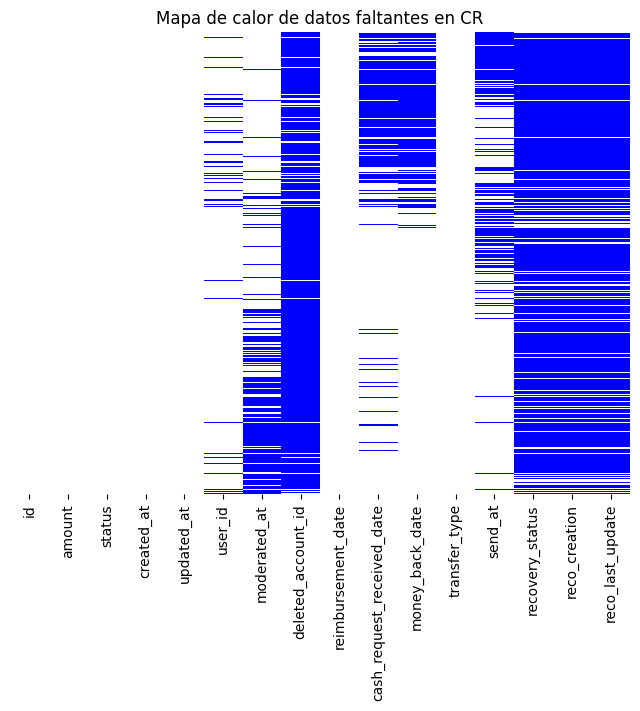

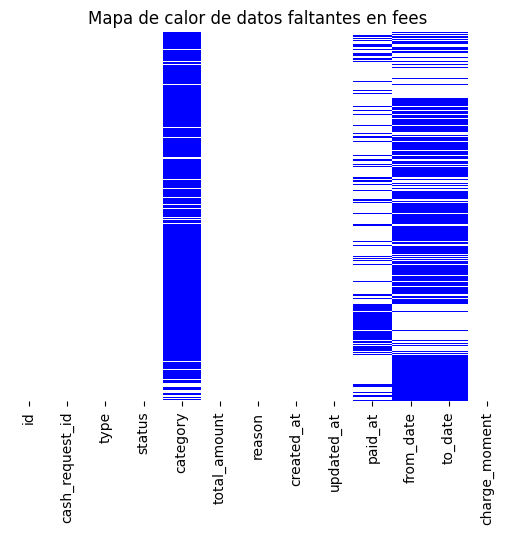

In [14]:
from matplotlib.colors import LinearSegmentedColormap

# Create a boolean DataFrame where True indicates null values
fees_data_null = fees.isnull()
cash_requests_null = cash.isnull()

# Define a custom color map
colors = ["white", "blue"]  # white for False values, bluee for True values
cmap = LinearSegmentedColormap.from_list("custom", colors, N=2)
plt.figure(figsize=(8, 6))

# Crear un mapa de calor de los datos faltantes
sns.heatmap(cash_requests_null, cbar=False, yticklabels=False, cmap=cmap)
plt.title('Mapa de calor de datos faltantes en CR')
plt.show()

#Para tabla fees
sns.heatmap(fees_data_null, cbar=False, yticklabels=False, cmap=cmap)
plt.title('Mapa de calor de datos faltantes en fees')
plt.show()


**3.2 EDA analysis of the fees**

In [15]:
# change data type to_datetime in df_fees (pretty function Thanks to Javier)
fees[["created_at", "updated_at", "paid_at", "from_date", "to_date"]] = \
    fees[["created_at", "updated_at", "paid_at", "from_date", "to_date"]].apply(pd.to_datetime, format="ISO8601")

fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               21061 non-null  int64              
 1   cash_request_id  21057 non-null  float64            
 2   type             21061 non-null  object             
 3   status           21061 non-null  object             
 4   category         2196 non-null   object             
 5   total_amount     21061 non-null  float64            
 6   reason           21061 non-null  object             
 7   created_at       21061 non-null  datetime64[ns, UTC]
 8   updated_at       21061 non-null  datetime64[ns, UTC]
 9   paid_at          15531 non-null  datetime64[ns, UTC]
 10  from_date        7766 non-null   datetime64[ns, UTC]
 11  to_date          7766 non-null   datetime64[ns, UTC]
 12  charge_moment    21061 non-null  object             
dtypes: datetime64[ns

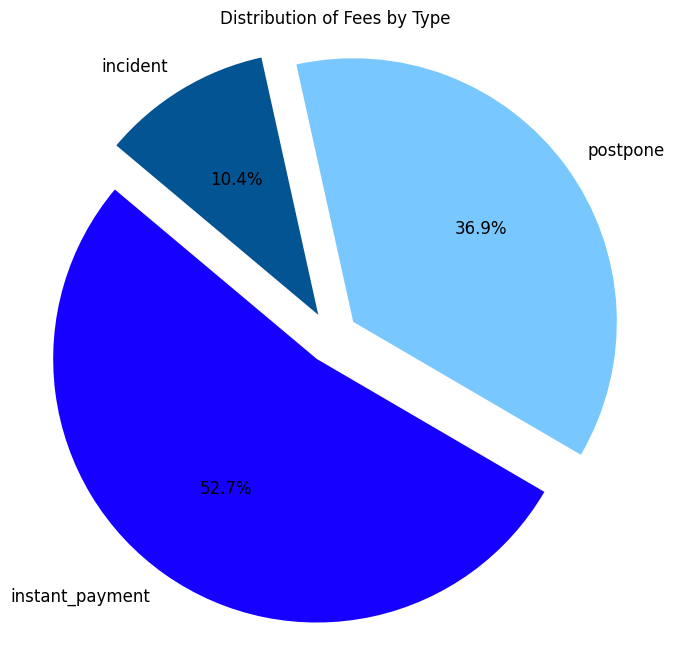

In [16]:
#Bar chart for the type of the fee distribution

type_counts = fees['type'].value_counts()
explode = [0.1, 0.1, 0.1]

# Define custom colors for each type
custom_colors = ['#1600ff', '#79c7ff', '#035493']  # Add more colors if needed

# Creating a pie chart with custom colors
plt.figure(figsize=(8, 8))  # Adjust the figure size if needed
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors, explode=explode,
        textprops={'color': 'Black', 'fontsize': 12})  # Specify white color and font size

# Adding title
plt.title('Distribution of Fees by Type')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Showing the plot
plt.show()

In [17]:
status_counts = fees['status'].value_counts()
status_counts

status
accepted     14841
cancelled     4938
rejected      1194
confirmed       88
Name: count, dtype: int64

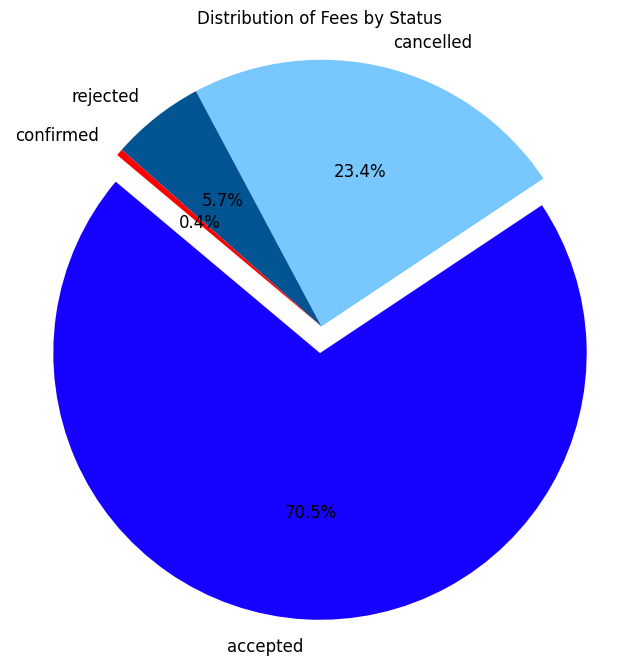

In [18]:
#Bar chart for the type of the fee distribution

status_counts = fees['status'].value_counts()
explode = [0.1, 0, 0, 0]

# Define custom colors for each type
custom_colors = ['#1600ff', '#79c7ff', '#035493', 'red']  # Add more colors if needed

# Creating a pie chart with custom colors
plt.figure(figsize=(8, 8))  # Adjust the figure size if needed
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors, explode=explode,
        textprops={'color': 'Black', 'fontsize': 12})  # Specify white color and font size

# Adding title
plt.title('Distribution of Fees by Status')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Showing the plot
plt.show()

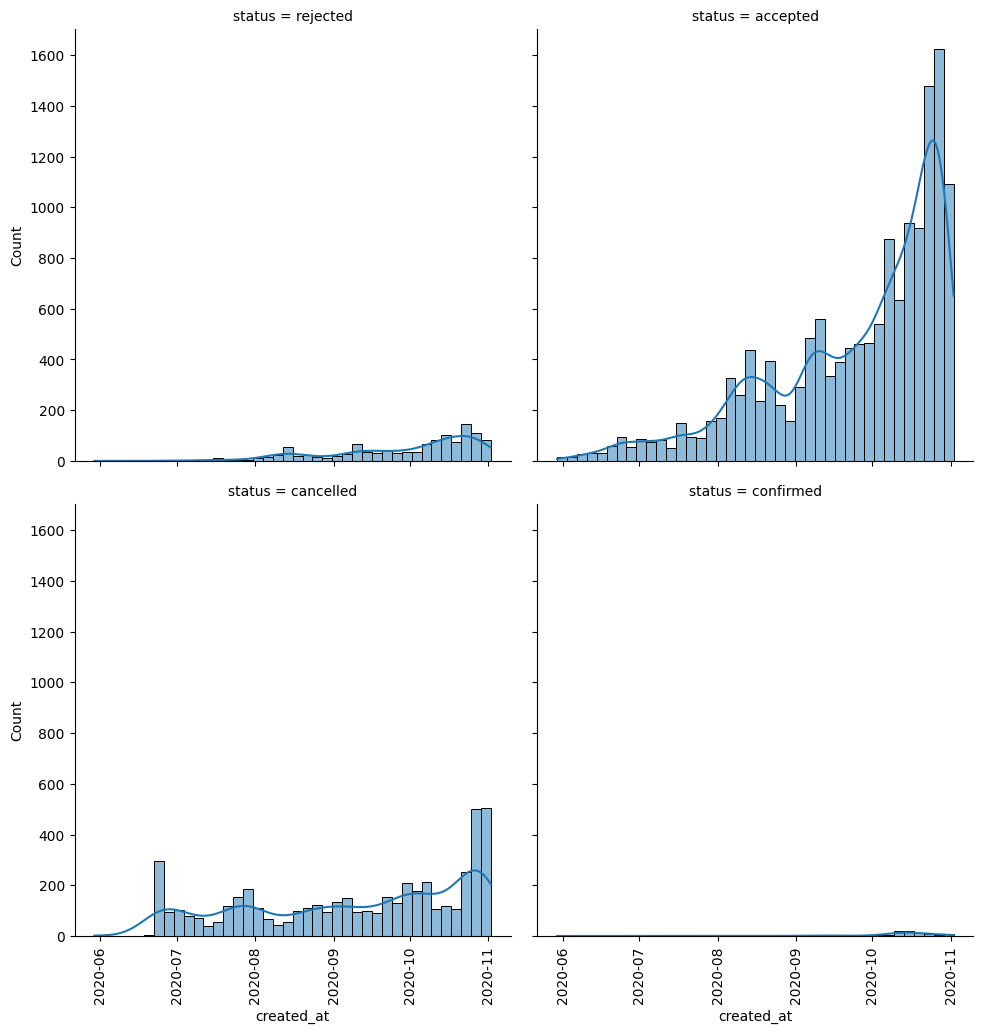

In [19]:
plot = sns.displot(data=fees, x="created_at", col="status", kde=True, col_wrap=2)

# Rotate x-axis labels vertically for all subplots
for ax in plot.axes.flat:
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# Show the plots
plt.show()

In [20]:
# Filter the DataFrame to include only rows where the status is "accepted"
accepted_fees = fees[fees['status'] == 'accepted']


# Group by 'cash_request_id' and sum up the 'total_amount' of fees
grouped_fees = accepted_fees.groupby('cash_request_id')['total_amount'].sum().reset_index()

for column in accepted_fees.columns:
    print("Value counts for column", column, ":")
    print(accepted_fees[column].value_counts())
    print()


Value counts for column id :
id
6961     1
5343     1
5296     1
5327     1
8666     1
        ..
13405    1
17155    1
19170    1
16339    1
13301    1
Name: count, Length: 14841, dtype: int64

Value counts for column cash_request_id :
cash_request_id
3759.0     13
5006.0      5
12452.0     5
2793.0      5
1655.0      5
           ..
25444.0     1
23875.0     1
22482.0     1
24602.0     1
20616.0     1
Name: count, Length: 11846, dtype: int64

Value counts for column type :
type
instant_payment    10296
postpone            2985
incident            1560
Name: count, dtype: int64

Value counts for column status :
status
accepted    14841
Name: count, dtype: int64

Value counts for column category :
category
rejected_direct_debit     1284
month_delay_on_payment     276
Name: count, dtype: int64

Value counts for column total_amount :
total_amount
5.0     14840
10.0        1
Name: count, dtype: int64

Value counts for column reason :
reason
rejected direct debit                 1284
month

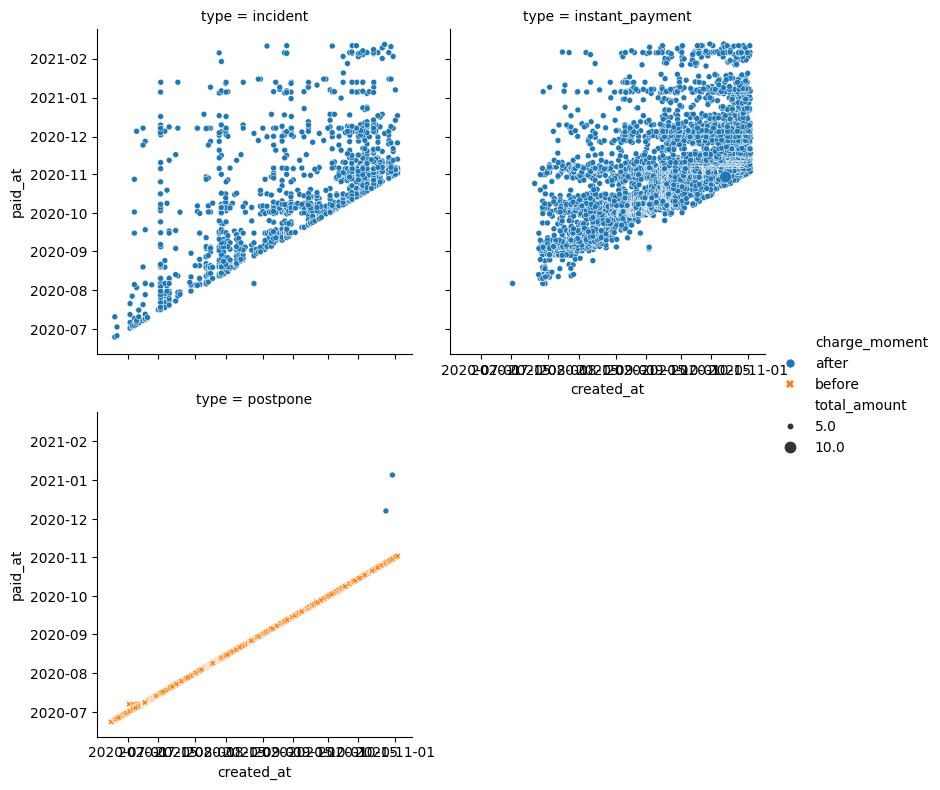

In [21]:

plot = sns.relplot(
    data=accepted_fees,
    x="created_at", y="paid_at", col="type",
    hue="charge_moment", style="charge_moment", size="total_amount",
    col_wrap=2, height=4)  # Adjust col_wrap and height as needed

# Get the x-axis tick labels

xticklabels = [label.get_text() for label in plot.axes[0].get_xticklabels()]
#xticklabels2 = [label.get_text() for label in plot.axes[1].get_xticklabels()]

# Set rotation to 90 degrees for x-axis labels
#plt.xticks(rotation=90)

# Show the plots
plt.show()

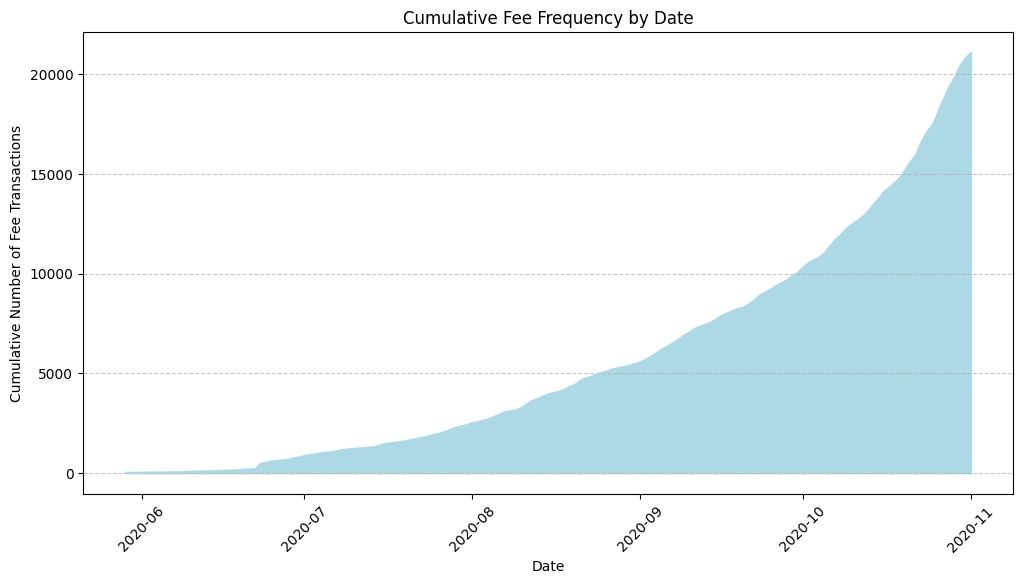

In [22]:
# Convert dates to datetime type
fees['created_at'] = pd.to_datetime(fees['created_at'])

# Group by date and count the number of transactions
transactions_by_date = fees.groupby(fees['created_at'].dt.date).size()

plt.figure(figsize=(12, 6))
transactions_by_date.cumsum().plot(kind='area', color='lightblue')
plt.title('Cumulative Fee Frequency by Date')
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Fee Transactions')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [23]:
not_paid_fees = fees[(fees['paid_at'].isna()) & (fees['from_date'].isna())]
for column in not_paid_fees.columns:
    print("Value counts for column", column, ":")
    print(not_paid_fees[column].value_counts())
    print()


Value counts for column id :
id
21158    1
12574    1
12044    1
10776    1
20917    1
        ..
5502     1
5430     1
5328     1
5327     1
20897    1
Name: count, Length: 543, dtype: int64

Value counts for column cash_request_id :
cash_request_id
8665.0     4
4083.0     4
5123.0     4
3611.0     4
7333.0     4
          ..
3398.0     1
9214.0     1
7934.0     1
2626.0     1
17900.0    1
Name: count, Length: 413, dtype: int64

Value counts for column type :
type
incident           442
instant_payment    101
Name: count, dtype: int64

Value counts for column status :
status
rejected     277
accepted     110
confirmed     86
cancelled     70
Name: count, dtype: int64

Value counts for column category :
category
rejected_direct_debit     256
month_delay_on_payment    186
Name: count, dtype: int64

Value counts for column total_amount :
total_amount
5.0    543
Name: count, dtype: int64

Value counts for column reason :
reason
rejected direct debit                 256
month delay on paym

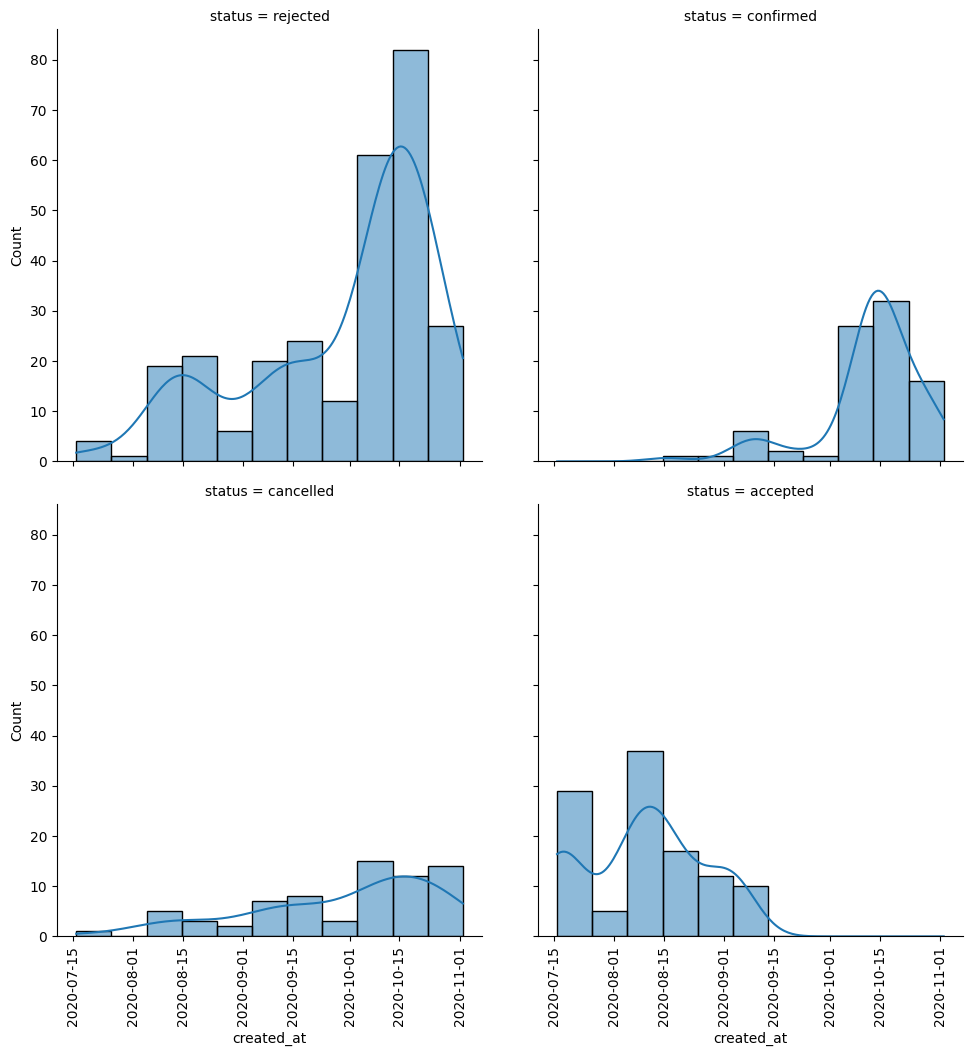

In [24]:
plot = sns.displot(data=not_paid_fees, x="created_at", col="status", kde=True, col_wrap=2)

# Rotate x-axis labels vertically for all subplots
for ax in plot.axes.flat:
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels vertically

# Show the plots
plt.show()

EDA ANALYSIS DE TABLA CASH REQUEST

In [25]:
#CONVERTING TO DATETIME FORMAT 

cash[["created_at", "updated_at", "moderated_at", "reimbursement_date", "cash_request_received_date", "money_back_date", "send_at"]] = \
    cash[["created_at", "updated_at", "moderated_at", "reimbursement_date", "cash_request_received_date", "money_back_date", "send_at"]].apply(pd.to_datetime, format="ISO8601")


cash['created_month'] = cash['created_at'].dt.to_period('M')
cash['updated_month'] = cash['updated_at'].dt.to_period('M')
cash['created_day_of_week'] = cash['created_at'].dt.day_name()
cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     21867 non-null  float64            
 6   moderated_at                16035 non-null  datetime64[ns, UTC]
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          23970 non-null  datetime64[ns, UTC]
 9   cash_request_received_date  16289 non-null  datetime64[ns]     
 10  money_back_date             16543 non-null  datetime64[ns,

/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_73851/1243918155.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['created_month'] = cash['created_at'].dt.to_period('M')
/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_73851/1243918155.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cash['updated_month'] = cash['updated_at'].dt.to_period('M')


In [26]:
day_of_week_counts = cash.groupby(['created_day_of_week']).size().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

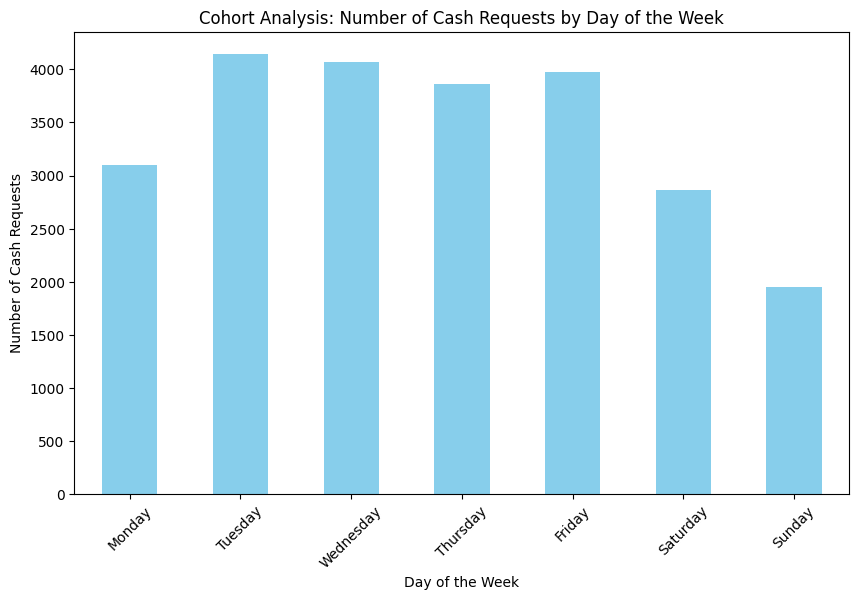

In [27]:
# Plot the cohort analysis by day of the week
plt.figure(figsize=(10, 6))
day_of_week_counts.plot(kind='bar', color='skyblue')
plt.title('Cohort Analysis: Number of Cash Requests by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Cash Requests')
plt.xticks(rotation=45)
plt.show()

In [28]:
cash['created_at'] = pd.to_datetime(cash['created_at'])
cash['reimbursement_date'] = pd.to_datetime(cash['reimbursement_date'])

In [29]:
def categorize_time_of_day(hour):
    if 7 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

In [30]:
cash['time_of_day'] = cash['created_at'].dt.hour.apply(categorize_time_of_day)
cash['hour_created'] = cash['created_at'].dt.hour
cohort_analysis = cash.groupby('time_of_day').size().sort_values()

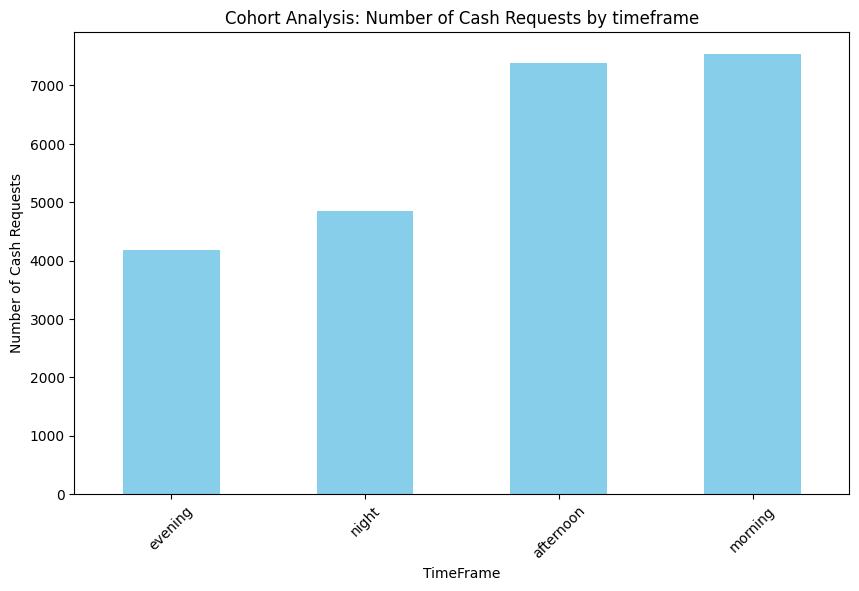

In [31]:
# Plot the cohort analysis by day of the week
plt.figure(figsize=(10, 6))
cohort_analysis.plot(kind='bar', color='skyblue')
plt.title('Cohort Analysis: Number of Cash Requests by timeframe')
plt.xlabel('TimeFrame')
plt.ylabel('Number of Cash Requests')
plt.xticks(rotation=45)
plt.show()

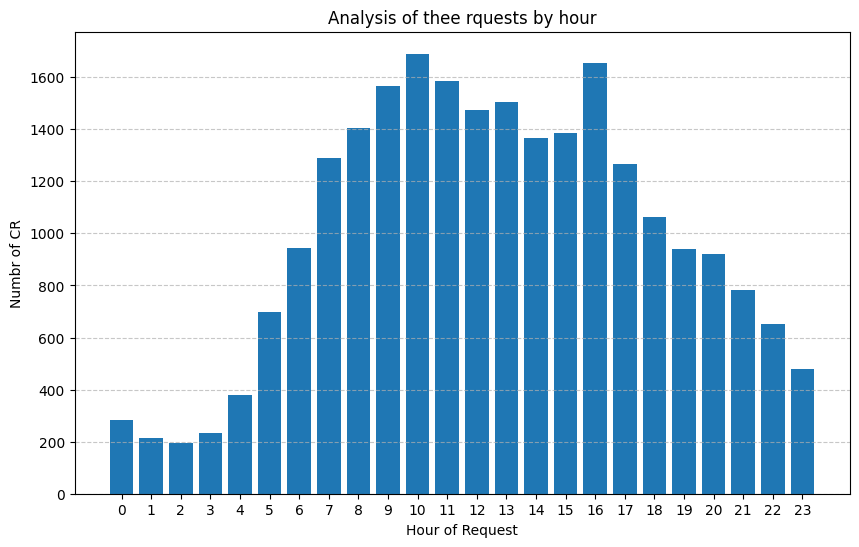

In [32]:
# Group by hour_created 
cohort_analysis2 = cash.groupby('hour_created').size()
# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(cohort_analysis2.index, cohort_analysis2.values)
plt.xlabel('Hour of Request')
plt.ylabel('Numbr of CR')
plt.title('Analysis of thee rquests by hour')
plt.xticks(range(24))  # Show all hours
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1200x800 with 0 Axes>

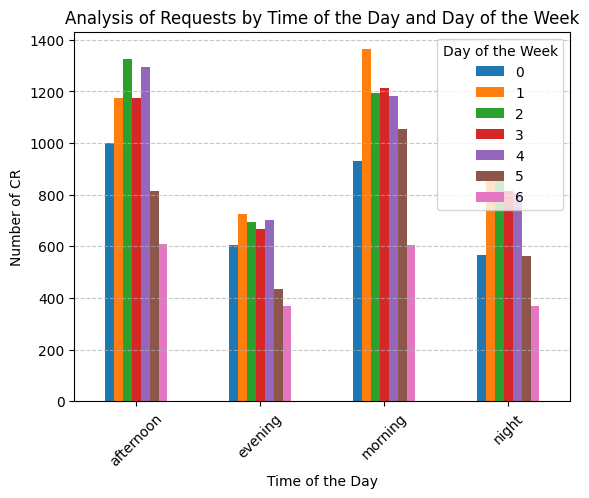

In [33]:
# Group the data by time category and day of the week
grouped = cash.groupby(['time_of_day', cash['created_at'].dt.dayofweek]).size().unstack()

# Plot a grouped bar chart
plt.figure(figsize=(12, 8))
grouped.plot(kind='bar', stacked=False)
plt.xlabel('Time of the Day')
plt.ylabel('Number of CR')
plt.title('Analysis of Requests by Time of the Day and Day of the Week')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1200x800 with 0 Axes>

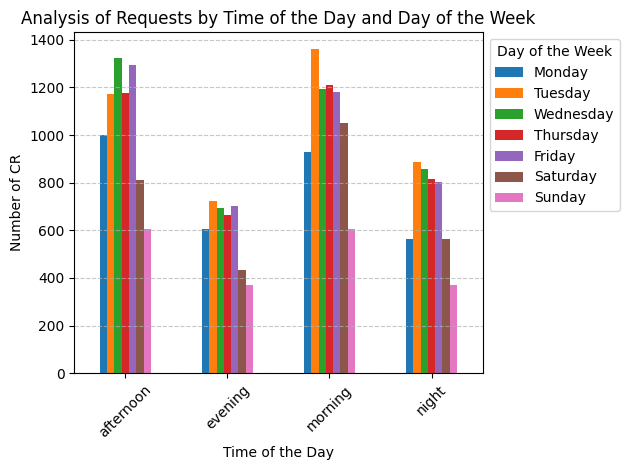

In [34]:
import calendar

# Group the data by time category and day of the week
grouped = cash.groupby(['time_of_day', cash['created_at'].dt.dayofweek]).size().unstack()

# Get weekday names
weekday_names = [calendar.day_name[i] for i in range(7)]

# Plot a grouped bar chart
plt.figure(figsize=(12, 8))
grouped.plot(kind='bar', stacked=False)
plt.xlabel('Time of the Day')
plt.ylabel('Number of CR')
plt.title('Analysis of Requests by Time of the Day and Day of the Week')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week', labels=weekday_names, loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of legend
plt.show()

<Figure size 2200x800 with 0 Axes>

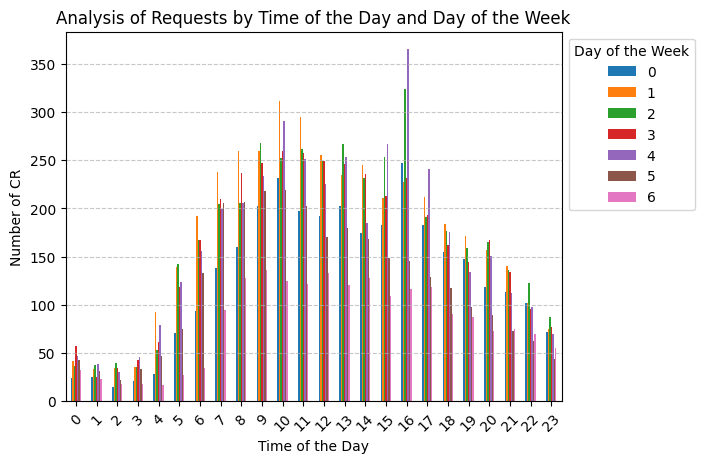

In [35]:
# Group the data by time category and day of the week
grouped = cash.groupby(['hour_created', cash['created_at'].dt.dayofweek]).size().unstack()

# Plot a grouped bar chart
plt.figure(figsize=(22, 8))
grouped.plot(kind='bar', stacked=False)
plt.xlabel('Time of the Day')
plt.ylabel('Number of CR')
plt.title('Analysis of Requests by Time of the Day and Day of the Week')
plt.xticks(rotation=45)
plt.legend(title='Day of the Week', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

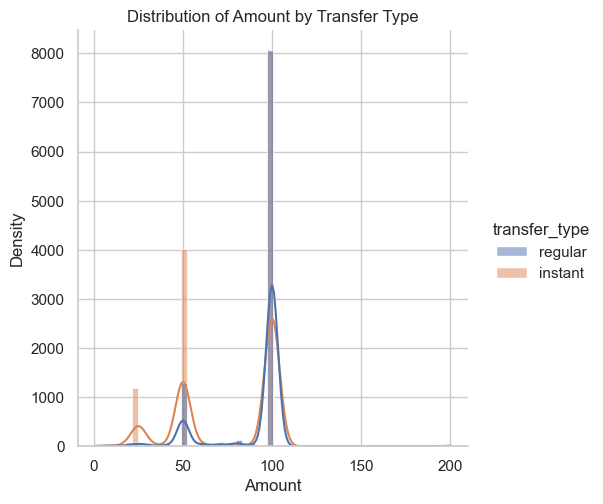

In [36]:
sns.set(style="whitegrid")
g = sns.displot(data=cash, x="amount", hue="transfer_type", kde=True, multiple="layer")
g.set_axis_labels("Amount", "Density")
plt.title("Distribution of Amount by Transfer Type")
plt.show()

In [37]:
#Checking number of the unique cash requests ID in a feeees
unique_cash_requests_fees=fees['cash_request_id'].unique()
num_unique_ids = len(unique_cash_requests_fees)
print("Number of unique cashrequest_ids in fees:", num_unique_ids)


Number of unique cashrequest_ids in fees: 12934


In [38]:
filtered_cash = cash[cash['id'].isin(unique_cash_requests_fees)]
filtered_cash.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12933 entries, 48 to 23969
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          12933 non-null  int64              
 1   amount                      12933 non-null  float64            
 2   status                      12933 non-null  object             
 3   created_at                  12933 non-null  datetime64[ns, UTC]
 4   updated_at                  12933 non-null  datetime64[ns, UTC]
 5   user_id                     12496 non-null  float64            
 6   moderated_at                5560 non-null   datetime64[ns, UTC]
 7   deleted_account_id          437 non-null    float64            
 8   reimbursement_date          12933 non-null  datetime64[ns, UTC]
 9   cash_request_received_date  11903 non-null  datetime64[ns]     
 10  money_back_date             12327 non-null  datetime64[ns, UTC

In [39]:
filtered_cash.rename(columns={'id': 'cash_request_id'}, inplace=True)
filtered_cash

/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_73851/1979025921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_cash.rename(columns={'id': 'cash_request_id'}, inplace=True)


,cash_request_id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,...,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,created_month,updated_month,created_day_of_week,time_of_day,hour_created
48,23534,25.0,money_back,2020-10-23 15:20:26.163927+00:00,2020-12-18 13:08:29.099365+00:00,21465.0,NaT,NaN,2020-11-10 23:51:00+00:00,NaT,...,instant,2020-10-23 15:21:26.878525+00:00,NaN,NaN,NaN,2020-10,2020-12,Friday,afternoon,15
88,2203,100.0,money_back,2020-05-27 02:26:27.615190+00:00,2020-06-09 11:25:51.726360+00:00,2109.0,2020-05-27 10:02:13.094467+00:00,NaN,2020-07-15 02:26:27+00:00,2020-05-29,...,regular,NaT,NaN,NaN,NaN,2020-05,2020-06,Wednesday,night,2
141,6098,100.0,active,2020-07-01 09:30:03.145410+00:00,2020-08-11 22:27:58.240406+00:00,23328.0,2020-07-01 16:44:53.070844+00:00,NaN,2020-08-03 22:00:00+00:00,2020-07-03,...,regular,NaT,pending,2020-08-11 22:27:55.367849+00,2020-08-11 22:27:58.255621+00,2020-07,2020-08,Wednesday,morning,9
143,3611,100.0,direct_debit_rejected,2020-06-17 11:03:32.617120+00:00,2020-07-21 22:09:32.695508+00:00,15415.0,2020-06-17 14:52:56.141750+00:00,NaN,2020-07-17 11:03:52.469000+00:00,2020-06-18,...,regular,NaT,pending,2020-07-21 22:09:32.578876+00,2020-07-21 22:09:35.337684+00,2020-06,2020-07,Wednesday,morning,11
161,20639,50.0,money_back,2020-10-12 16:05:27.478409+00:00,2020-12-18 13:12:06.313275+00:00,NaN,NaT,30317.0,2020-10-30 23:00:00+00:00,2020-10-16,...,instant,2020-10-15 06:29:31.161555+00:00,NaN,NaN,NaN,2020-10,2020-12,Monday,afternoon,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23965,20616,100.0,money_back,2020-10-12 13:54:11.686225+00:00,2021-02-06 20:17:49.292493+00:00,13681.0,NaT,NaN,2021-02-06 11:00:00+00:00,2020-10-13,...,instant,2020-10-12 13:54:24.352856+00:00,NaN,NaN,NaN,2020-10,2021-02,Monday,afternoon,13
23966,25243,50.0,money_back,2020-10-27 14:41:25.734910+00:00,2020-12-18 13:15:40.843946+00:00,NaN,NaT,30367.0,2020-11-03 22:00:00+00:00,2020-10-28,...,instant,2020-10-27 14:41:57.901946+00:00,completed,2020-11-12 23:20:41.928788+00,2020-12-01 13:26:53.815504+00,2020-10,2020-12,Tuesday,afternoon,14
23967,22357,100.0,money_back,2020-10-20 07:58:04.006937+00:00,2021-02-05 12:19:30.656816+00:00,82122.0,NaT,NaN,2021-02-05 11:00:00+00:00,2020-10-21,...,instant,2020-10-20 07:58:14.171553+00:00,NaN,NaN,NaN,2020-10,2021-02,Tuesday,morning,7
23968,20256,100.0,money_back,2020-10-10 05:40:55.700422+00:00,2021-02-05 13:14:19.707627+00:00,64517.0,NaT,NaN,2021-02-05 11:00:00+00:00,2020-10-12,...,instant,2020-10-10 05:41:23.368363+00:00,NaN,NaN,NaN,2020-10,2021-02,Saturday,night,5


In [40]:
fees.head()

,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00:00,2020-12-17 14:50:07.470110+00:00,NaT,NaT,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,2020-12-08 17:13:10.459080+00:00,NaT,NaT,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00:00,2020-11-04 19:34:37.432910+00:00,NaT,NaT,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00:00,2020-11-19 05:09:22.500223+00:00,NaT,NaT,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00:00,2020-11-02 14:45:20.355598+00:00,NaT,NaT,after


In [41]:
new_column_names = {
    'type': 'type_f',
    'status': 'status_f',
     'category': 'category_f',
    'total_amount': 'total_amount_f',
     'reason': 'reason_f',
    'created_at': 'created_at_f',
     'updated_at': 'updated_at_f',
    'paid_at': 'paid_at_f',
     'from_date': 'from_date_f',
    'to_date': 'to_date_f',
     'charge_moment': 'charge_moment_f'
}

# Rename all columns using the dictionary
fees.rename(columns=new_column_names, inplace=True)
fees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21061 entries, 0 to 21060
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               21061 non-null  int64              
 1   cash_request_id  21057 non-null  float64            
 2   type_f           21061 non-null  object             
 3   status_f         21061 non-null  object             
 4   category_f       2196 non-null   object             
 5   total_amount_f   21061 non-null  float64            
 6   reason_f         21061 non-null  object             
 7   created_at_f     21061 non-null  datetime64[ns, UTC]
 8   updated_at_f     21061 non-null  datetime64[ns, UTC]
 9   paid_at_f        15531 non-null  datetime64[ns, UTC]
 10  from_date_f      7766 non-null   datetime64[ns, UTC]
 11  to_date_f        7766 non-null   datetime64[ns, UTC]
 12  charge_moment_f  21061 non-null  object             
dtypes: datetime64[ns

In [42]:
merged_df = pd.merge(fees, filtered_cash, on='cash_request_id', how='inner')
merged_df

,id,cash_request_id,type_f,status_f,category_f,total_amount_f,reason_f,created_at_f,updated_at_f,paid_at_f,...,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,created_month,updated_month,created_day_of_week,time_of_day,hour_created
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.423150+00:00,2020-10-13 14:25:09.396112+00:00,2020-12-17 14:50:07.470110+00:00,...,instant,2020-09-14 10:46:57.735172+00:00,pending,2020-10-11 22:52:52.274832+00,2020-12-20 22:40:42.556534+00,2020-09,2020-12,Monday,morning,10
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00:00,2020-10-13 14:25:15.537063+00:00,2020-12-08 17:13:10.459080+00:00,...,instant,2020-08-17 13:15:54.290998+00:00,completed,2020-09-09 20:51:17.992852+00,2020-10-10 22:58:13.306027+00,2020-08,2020-12,Monday,afternoon,13
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00:00,2020-10-23 10:10:58.352994+00:00,2020-11-04 19:34:37.432910+00:00,...,instant,2020-10-23 10:10:52.894637+00:00,NaN,NaN,NaN,2020-10,2020-12,Friday,morning,10
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00:00,2020-10-31 15:46:53.643982+00:00,2020-11-19 05:09:22.500223+00:00,...,instant,2020-10-31 15:46:46.846335+00:00,NaN,NaN,NaN,2020-10,2020-12,Saturday,afternoon,15
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00:00,2020-10-13 14:25:03.267983+00:00,2020-11-02 14:45:20.355598+00:00,...,instant,2020-10-13 00:40:23.983346+00:00,completed,2020-10-24 22:43:13.278707+00,2020-11-02 14:45:20.333109+00,2020-10,2020-12,Tuesday,night,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21052,12372,20262.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 20262,2020-10-10 06:42:22.822743+00:00,2020-10-13 14:25:04.180490+00:00,2020-11-17 05:14:00.080854+00:00,...,instant,2020-10-10 06:41:59.613815+00:00,pending,2020-11-21 22:21:53.12443+00,2020-11-21 22:21:57.85823+00,2020-10,2020-11,Saturday,night,6
21053,20768,26764.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 26764,2020-10-31 15:24:18.680694+00:00,2020-10-31 15:24:18.680715+00:00,2020-12-16 07:10:54.697639+00:00,...,instant,2020-10-31 15:23:28.966185+00:00,pending,2020-11-21 22:50:26.679591+00,2020-12-19 22:30:03.346628+00,2020-10,2020-12,Saturday,afternoon,15
21054,18779,25331.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25331,2020-10-27 17:28:51.749177+00:00,2020-10-27 17:28:51.749200+00:00,2020-11-18 04:35:42.915511+00:00,...,instant,2020-10-27 17:28:27.073945+00:00,pending,2020-11-22 22:15:47.957828+00,2020-11-22 22:15:51.383283+00,2020-10,2020-11,Tuesday,evening,17
21055,16542,23628.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 23628,2020-10-23 16:27:52.047457+00:00,2020-10-23 16:27:52.047486+00:00,2020-12-18 05:18:01.465317+00:00,...,instant,2020-10-23 16:27:48.109023+00:00,pending,2020-11-25 22:43:52.728522+00,2020-12-23 22:42:25.1848+00,2020-10,2020-12,Friday,afternoon,16


In [43]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21057 entries, 0 to 21056
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          21057 non-null  int64              
 1   cash_request_id             21057 non-null  float64            
 2   type_f                      21057 non-null  object             
 3   status_f                    21057 non-null  object             
 4   category_f                  2196 non-null   object             
 5   total_amount_f              21057 non-null  float64            
 6   reason_f                    21057 non-null  object             
 7   created_at_f                21057 non-null  datetime64[ns, UTC]
 8   updated_at_f                21057 non-null  datetime64[ns, UTC]
 9   paid_at_f                   15531 non-null  datetime64[ns, UTC]
 10  from_date_f                 7766 non-null   datetime64[ns,

In [44]:
merged_df.to_csv('merged_df.csv', index=False)

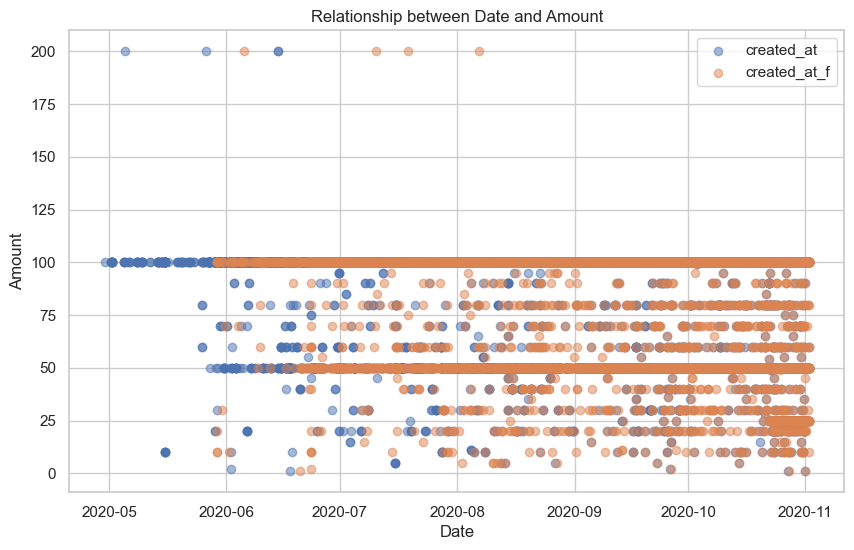

In [45]:
status_counts = merged_df['status'].value_counts()

# Explore the relationship between the date columns and "amount"
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['created_at'], merged_df['amount'], alpha=0.5, label='created_at')
plt.scatter(merged_df['created_at_f'], merged_df['amount'], alpha=0.5, label='created_at_f')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Relationship between Date and Amount')
plt.legend()
plt.show()

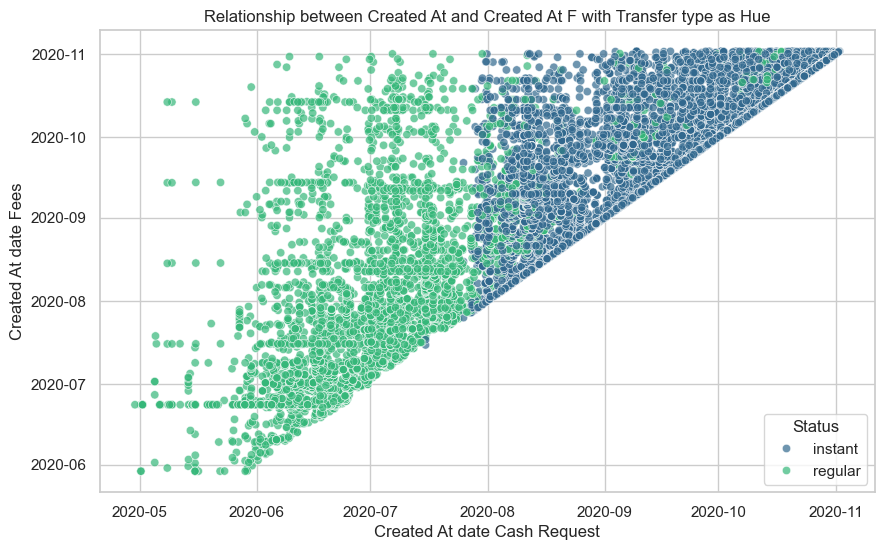

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='created_at', y='created_at_f', hue='transfer_type', palette='viridis', alpha=0.7)
plt.xlabel('Created At date Cash Request')
plt.ylabel('Created At date Fees')
plt.title('Relationship between Created At and Created At F with Transfer type as Hue')
plt.legend(title='Status')
plt.show()

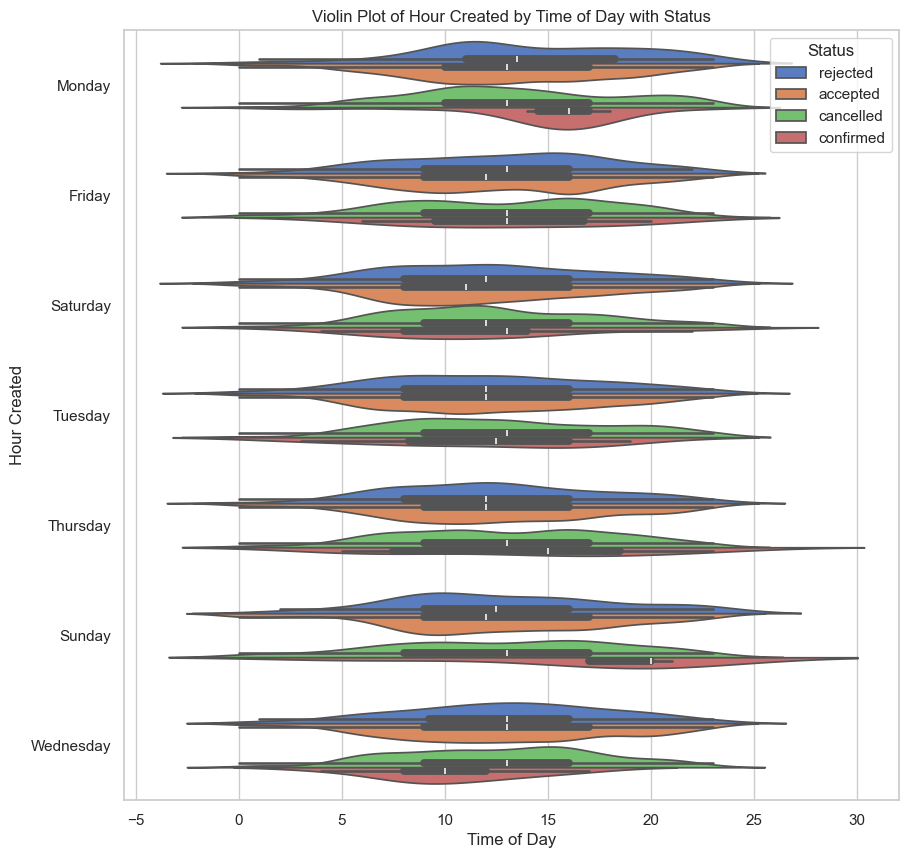

In [47]:
sns.set_style("whitegrid")

# Create the violin plot with hue
plt.figure(figsize=(10, 10))
sns.violinplot(data=merged_df, x="hour_created", y="created_day_of_week", hue="status_f", palette="muted", split=True)

# Add labels and title
plt.xlabel("Time of Day")
plt.ylabel("Hour Created")
plt.title("Violin Plot of Hour Created by Time of Day with Status")

# Add a legend
plt.legend(title="Status")

# Show the plot
plt.show()


In [48]:
filtered_merge = merged_df[(merged_df['type_f'] == 'incident') | (merged_df['type_f'] == 'postpone')]
filtered_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9962 entries, 1 to 21047
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          9962 non-null   int64              
 1   cash_request_id             9962 non-null   float64            
 2   type_f                      9962 non-null   object             
 3   status_f                    9962 non-null   object             
 4   category_f                  2196 non-null   object             
 5   total_amount_f              9962 non-null   float64            
 6   reason_f                    9962 non-null   object             
 7   created_at_f                9962 non-null   datetime64[ns, UTC]
 8   updated_at_f                9962 non-null   datetime64[ns, UTC]
 9   paid_at_f                   4533 non-null   datetime64[ns, UTC]
 10  from_date_f                 7766 non-null   datetime64[ns, UTC]


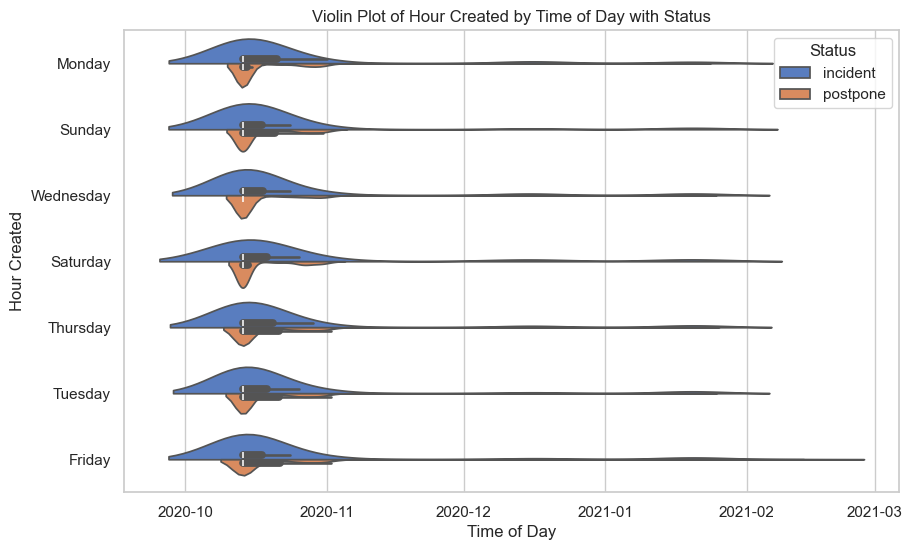

In [49]:
sns.set_style("whitegrid")

# Create the violin plot with hue
plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered_merge, x="updated_at_f", y="created_day_of_week", hue="type_f", palette="muted", split=True)

# Add labels and title
plt.xlabel("Time of Day")
plt.ylabel("Hour Created")
plt.title("Violin Plot of Hour Created by Time of Day with Status")

# Add a legend
plt.legend(title="Status")

# Show the plot
plt.show()

In [50]:
merged_df['created_at_f'] = pd.to_datetime(merged_df['created_at_f'],  format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
merged_df['paid_at_f'] = pd.to_datetime(merged_df['paid_at_f'],  format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

# Calculate duration between created_at and reimbursement_date in full days
merged_df['reimburshemeent_time'] = (merged_df['reimbursement_date'] - merged_df['created_at']).dt.days

# Calculate difference between created_at_f and paid_at_f in full days
merged_df['Fee_payment_time'] = (merged_df['paid_at_f'] - merged_df['created_at_f']).dt.days

# Check the descriptive statistics
print(merged_df.describe())

                 id  cash_request_id  total_amount_f        amount  \
count  21057.000000     21057.000000    21057.000000  21057.000000   
mean   10646.670228     16318.449162        5.000237     81.833547   
min        1.000000      1456.000000        5.000000      1.000000   
25%     5388.000000     11745.000000        5.000000     50.000000   
50%    10654.000000     17160.000000        5.000000    100.000000   
75%    15926.000000     21796.000000        5.000000    100.000000   
max    21193.000000     27010.000000       10.000000    200.000000   
std     6099.136169      6656.149949        0.034457     26.945058   

             user_id  deleted_account_id     cash_request_received_date  \
count   20151.000000          906.000000                          19763   
mean    37988.603940        17334.621413  2020-09-09 01:15:29.190912512   
min        47.000000         3857.000000            2020-05-04 00:00:00   
25%     14868.000000        11051.000000            2020-08-11 00:00:

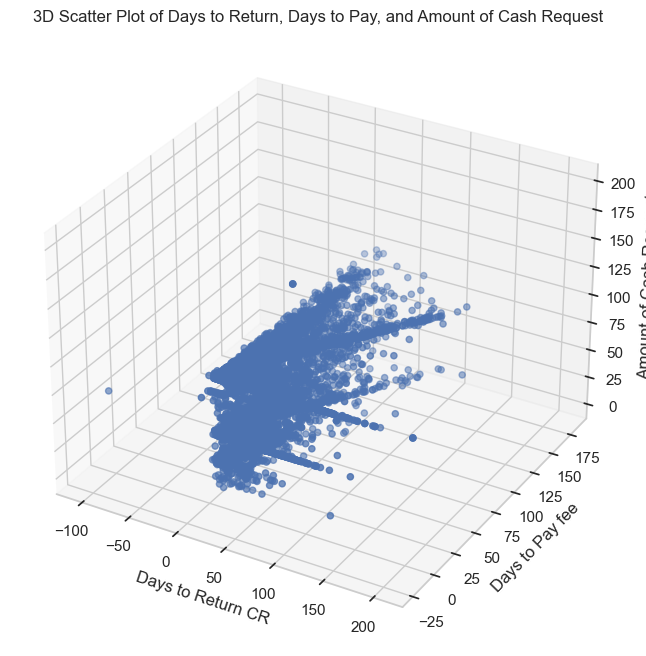

In [51]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(merged_df['reimburshemeent_time'], merged_df['Fee_payment_time'], merged_df['amount'])

# Set labels and title
ax.set_xlabel('Days to Return CR')
ax.set_ylabel('Days to Pay fee')
ax.set_zlabel('Amount of Cash Request')
ax.set_title('3D Scatter Plot of Days to Return, Days to Pay, and Amount of Cash Request')

plt.show()

In [52]:
merged_df['Fee_payment_time'].fillna(0, inplace=True)

# Convert the 'reimburshemeent_time' and 'Fee_payment_time' columns to integers
merged_df['reimburshemeent_time'] = merged_df['reimburshemeent_time'].astype(int)
merged_df['Fee_payment_time'] = merged_df['Fee_payment_time'].astype(int)

# Count number of rows with negative values in reimbursement_time column
negative_reimbursement_count = (merged_df['reimburshemeent_time'] <= 0).sum()

# Count number of rows with negative values in Fee_payment_time column
negative_fee_payment_count = (merged_df['Fee_payment_time'] < 0).sum()

print("Number of rows with negative reimbursement time:", negative_reimbursement_count)
print("Number of rows with negative fee payment time:", negative_fee_payment_count)

Number of rows with negative reimbursement time: 1
Number of rows with negative fee payment time: 22


/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_73851/142827742.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Fee_payment_time'].fillna(0, inplace=True)


In [53]:
subset_df = merged_df[(merged_df['reimburshemeent_time'] >= 0) & (merged_df['Fee_payment_time'] >= 0)]

for column in subset_df.columns:
    print("Value counts for column", column, ":")
    print(subset_df[column].value_counts())
    print()

Value counts for column id :
id
6537     1
7842     1
5217     1
10527    1
7809     1
        ..
20101    1
17541    1
20510    1
17198    1
13301    1
Name: count, Length: 21034, dtype: int64

Value counts for column cash_request_id :
cash_request_id
12225.0    35
5006.0     28
4410.0     24
12452.0    23
11376.0    21
           ..
4844.0      1
4044.0      1
22537.0     1
14257.0     1
25331.0     1
Name: count, Length: 12913, dtype: int64

Value counts for column type_f :
type_f
instant_payment    11077
postpone            7762
incident            2195
Name: count, dtype: int64

Value counts for column status_f :
status_f
accepted     14819
cancelled     4933
rejected      1194
confirmed       88
Name: count, dtype: int64

Value counts for column category_f :
category_f
rejected_direct_debit     1598
month_delay_on_payment     597
Name: count, dtype: int64

Value counts for column total_amount_f :
total_amount_f
5.0     21033
10.0        1
Name: count, dtype: int64

Value counts f

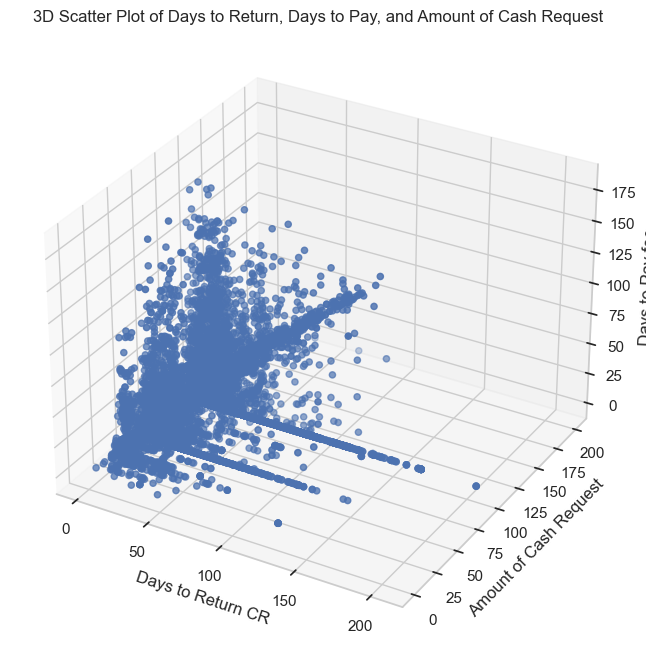

In [54]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(subset_df['reimburshemeent_time'], subset_df['amount'], subset_df['Fee_payment_time'])

# Set labels and title
ax.set_xlabel('Days to Return CR')
ax.set_ylabel('Amount of Cash Request')
ax.set_zlabel('Days to Pay fee')
ax.set_title('3D Scatter Plot of Days to Return, Days to Pay, and Amount of Cash Request')

plt.show()

In [55]:
subset_df['Cohort'] = subset_df.groupby('user_id')['created_at'].transform('min').dt.to_period('M')


/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_73851/99883876.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  subset_df['Cohort'] = subset_df.groupby('user_id')['created_at'].transform('min').dt.to_period('M')
/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_73851/99883876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Cohort'] = subset_df.groupby('user_id')['created_at'].transform('min').dt.to_period('M')


In [56]:
counts = subset_df.groupby('Cohort').agg(average_reimburshment_time = ('reimburshemeent_time',  'mean'), average_fee_pay =('Fee_payment_time',  'mean') )
counts

,average_reimburshment_time,average_fee_pay
Cohort,,
2020-04,31.800000,23.400000
2020-05,47.645793,13.483366
2020-06,42.463754,16.402185
2020-07,37.836294,16.965169
2020-08,35.069755,21.767035
2020-09,33.612493,21.396628
2020-10,22.920823,19.598892
2020-11,24.972973,28.527027


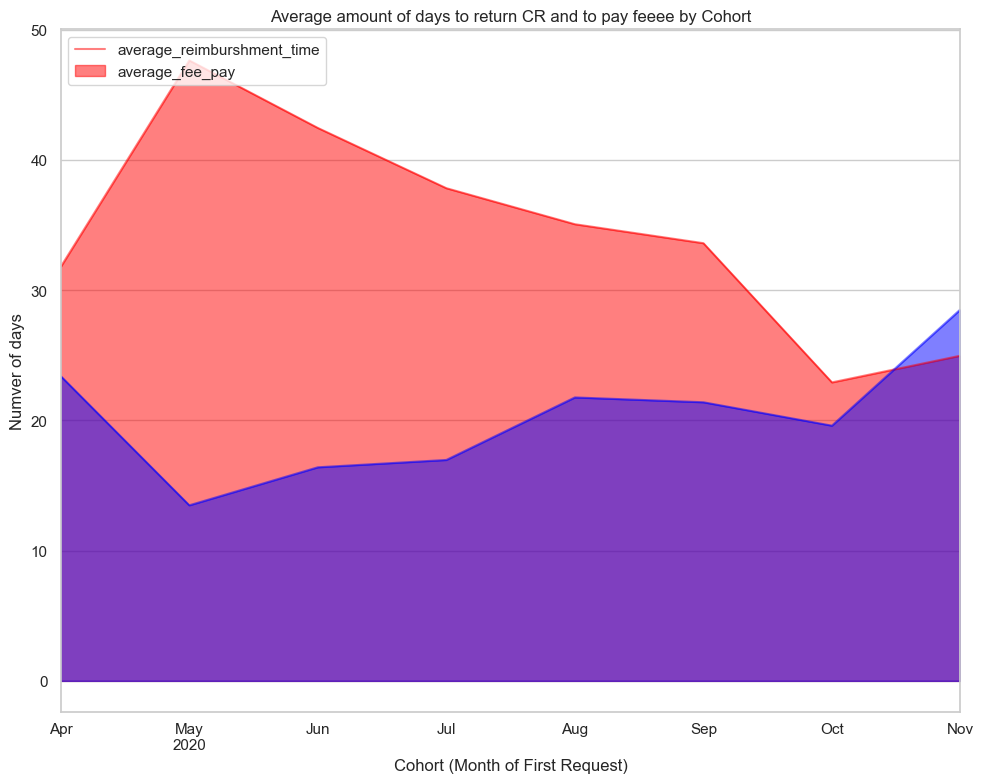

In [57]:
import matplotlib.pyplot as plt

# Create two subplots, one for the incident rate and one for total requests and total incidents
fig, ( ax2) = plt.subplots( 1, figsize=(10, 8))


counts[['average_reimburshment_time', 'average_fee_pay']].plot(kind='area', stacked=False, ax=ax2, alpha=0.5, color=['red', 'blue'])
ax2.set_title('Average amount of days to return CR and to pay feeee by Cohort')
ax2.set_xlabel('Cohort (Month of First Request)')
ax2.set_ylabel('Numver of days')
ax2.legend(['average_reimburshment_time', 'average_fee_pay'], loc='upper left')


plt.tight_layout()
plt.show()

In [ ]:
for column in merged_df.columns:
    print("Value counts for column", column, ":")
    print(merged_df[column].value_counts())
    print()

Value counts for column id :
id
6537     1
10103    1
7847     1
7846     1
7844     1
        ..
15940    1
18120    1
19214    1
6206     1
13301    1
Name: count, Length: 21057, dtype: int64

Value counts for column cash_request_id :
cash_request_id
12225.0    35
5006.0     28
4410.0     24
12452.0    23
11376.0    21
           ..
24822.0     1
26203.0     1
22956.0     1
23207.0     1
25331.0     1
Name: count, Length: 12933, dtype: int64

Value counts for column type_f :
type_f
instant_payment    11095
postpone            7766
incident            2196
Name: count, dtype: int64

Value counts for column status_f :
status_f
accepted     14841
cancelled     4934
rejected      1194
confirmed       88
Name: count, dtype: int64

Value counts for column category_f :
category_f
rejected_direct_debit     1599
month_delay_on_payment     597
Name: count, dtype: int64

Value counts for column total_amount_f :
total_amount_f
5.0     21056
10.0        1
Name: count, dtype: int64

Value counts f

In [ ]:
merged_df.sample(1)

,id,cash_request_id,type_f,status_f,category_f,total_amount_f,reason_f,created_at_f,updated_at_f,paid_at_f,...,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,created_month,updated_month,created_day_of_week,time_of_day,hour_created
19302,19287,25731.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 25731,2020-10-28 17:21:33.293684+00:00,2020-10-28 17:21:33.293713+00:00,2020-11-14 08:25:21.594106+00:00,...,instant,2020-10-28 17:21:26.671739+00:00,completed,2020-11-18 22:17:46.762801+00,2020-11-18 22:17:50.336802+00,2020-10,2020-12,Wednesday,evening,17


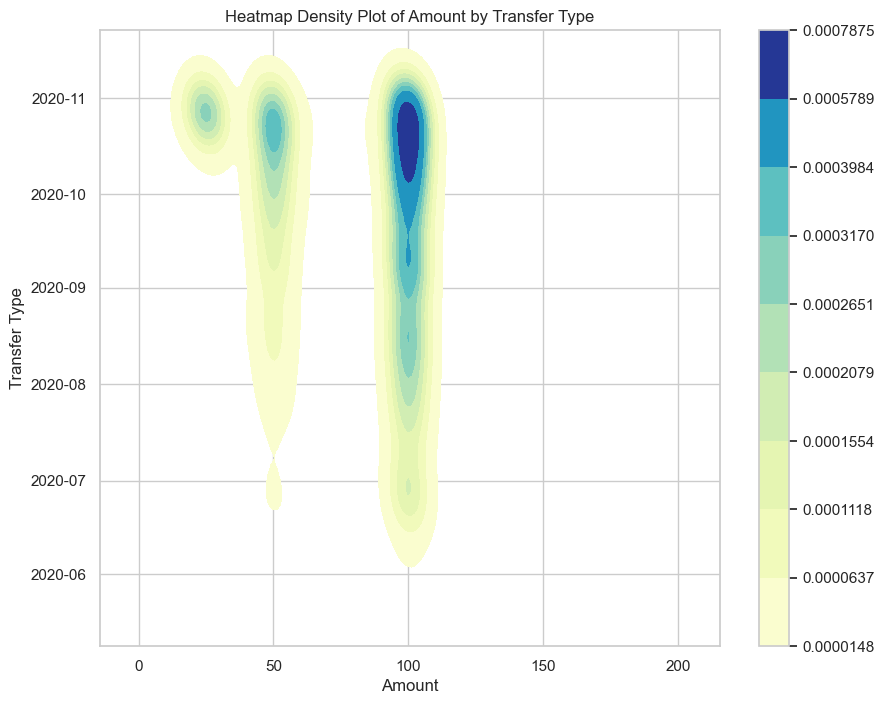

In [ ]:
# Assuming 'cash' is your DataFrame
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))  # Set the figure size

# Create a heatmap density plot
sns.kdeplot(data=merged_df, x="amount", y="created_at_f", fill=True, cmap="YlGnBu", cbar=True)

plt.title("Heatmap Density Plot of Amount by Transfer Type")
plt.xlabel("Amount")
plt.ylabel("Transfer Type")
plt.show()

In [ ]:
#Filtering meerged df to hVE ONLY ENTRADAS WITH MONEEY BACK STATUS
df_money_back = merged_df[['id', 'cash_request_id', 'total_amount_f', 'reason_f', ]].copy(deep=True)
df_money_back.head()

,id,cash_request_id,total_amount_f,reason_f
0,6537,14941.0,5.0,Instant Payment Cash Request 14941
1,6961,11714.0,5.0,rejected direct debit
2,16296,23371.0,5.0,Instant Payment Cash Request 23371
3,20775,26772.0,5.0,Instant Payment Cash Request 26772
4,11242,19350.0,5.0,Instant Payment Cash Request 19350
